# Shafiqul Alam Khan

# EE 5323 Digital Image Processing

# Homework #6

# Due Date: 3/31/2023

3. Write a Python program that reads in an RGB color image and performs histogram equalization separately on each color channel.

        a. Display the original image and the equalized image side-by-side.
        b. Allow the user to adjust the number of histogram bins and update the displayed image in real-time.
        c. Use the ‘strawberry.tiff’ file.

Enter Bin number(0-255) :255


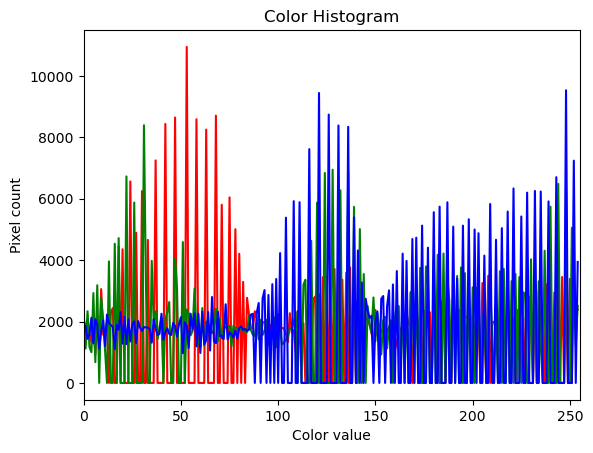

In [1]:
# Importing Libreries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Importing image
im = cv2.imread('strawberries.tif')

# Take input
input_bin = input ("Enter Bin number(0-255) :")
input_bin = int(input_bin)

# segregate color streams
b,g,r = cv2.split(im)
h_b, bin_b = np.histogram(b.flatten(), 256, [0, 256])
h_g, bin_g = np.histogram(g.flatten(), 256, [0, 256])
h_r, bin_r = np.histogram(r.flatten(), 256, [0, 256]) 

# calculate cdf    
cdf_b = np.cumsum(h_b)  
cdf_g = np.cumsum(h_g)
cdf_r = np.cumsum(h_r)

# mask all pixels with value=0 and replace it with mean of the pixel values 
cdf_m_b = np.ma.masked_equal(cdf_b,0)
cdf_m_b = (cdf_m_b - cdf_m_b.min())*input_bin/(cdf_m_b.max()-cdf_m_b.min())
cdf_final_b = np.ma.filled(cdf_m_b,0).astype('uint8')
  
cdf_m_g = np.ma.masked_equal(cdf_g,0)
cdf_m_g = (cdf_m_g - cdf_m_g.min())*input_bin/(cdf_m_g.max()-cdf_m_g.min())
cdf_final_g = np.ma.filled(cdf_m_g,0).astype('uint8')

cdf_m_r = np.ma.masked_equal(cdf_r,0)
cdf_m_r = (cdf_m_r - cdf_m_r.min())*input_bin/(cdf_m_r.max()-cdf_m_r.min())
cdf_final_r = np.ma.filled(cdf_m_r,0).astype('uint8')

# merge the images in the three channels
img_b = cdf_final_b[b]
img_g = cdf_final_g[g]
img_r = cdf_final_r[r]

img_out = cv2.merge((img_b, img_g, img_r))

# Creating side by side image
side_by_side = np.hstack((im,img_out))

# Showing the equalized image
cv2.imshow('Output Image', side_by_side)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

# tuple to select colors of each channel line
colors = ("red", "green", "blue")

# create the histogram plot, with three lines, one for each color
plt.figure()
plt.xlim([0, input_bin])
for channel_id, color in enumerate(colors):
    histogram, bin_edges = np.histogram(
        img_out[:, :, channel_id], bins=input_bin, range=(0, input_bin)
    )
    plt.plot(bin_edges[0:-1], histogram, color=color)

# Showing the histogram
plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")
plt.show()